# Fuzzy C-Means

É um algoritmo de clustering que permite que um dado ponto de dados pertença a vários clusters com graus de pertencimento especificados por um valor de pertinência, ao contrário do K-Means, onde cada ponto pertence a apenas um cluster.

**Funcionamento do FCM**
* **Inicialização dos Centróides:** Selecionar aleatoriamente c centróides iniciais.
* **Cálculo da Matriz de Pertinência:** Calcular os graus de pertinência de cada ponto de dado em relação a cada cluster.
* **Atualização dos Centróides:** Recalcular os centróides dos clusters com base nos graus de pertinência.
* **Iteração:** Repetir os passos de cálculo da matriz de pertinência e atualização dos centróides até que a mudança nos centróides seja menor que um limiar pré-definido ou até atingir um número máximo de iterações.

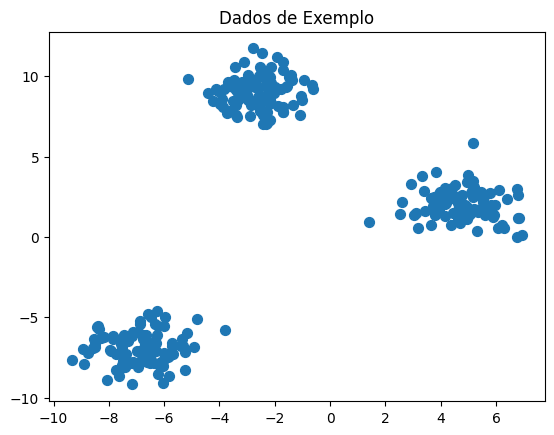

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Gerar um conjunto de dados de exemplo
n_samples = 300
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.00, random_state=42)

# Visualizar os dados
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Dados de Exemplo')
plt.show()

**Aplicação do Algoritmo Fuzzy C-Means:**
* A função fuzz.cluster.cmeans aplica o FCM aos dados.
* X.T: Matriz transposta dos dados.
* c=n_clusters: Número de clusters.
* m=2: Exponencial de fuzzyfication (controla o grau de fuzzyfication).
* error=0.005: Critério de erro para a convergência.
* maxiter=1000: Número máximo de iterações.
* init=None: Inicialização dos centróides.

In [5]:
# Aplicar o algoritmo Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)


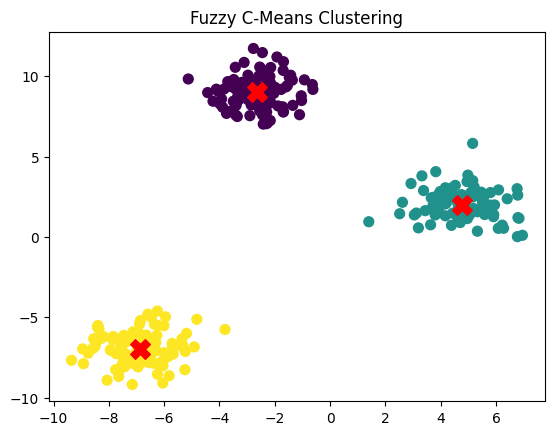

In [6]:
# Prever os clusters
cluster_membership = np.argmax(u, axis=0)

# Visualizar os resultados
plt.scatter(X[:, 0], X[:, 1], c=cluster_membership, cmap='viridis', s=50)
for cluster in range(n_clusters):
    plt.scatter(cntr[cluster, 0], cntr[cluster, 1], marker='X', s=200, c='red')
plt.title('Fuzzy C-Means Clustering')
plt.show()

**Considerações ao Usar Fuzzy C-Means**
* **Parâmetro m:** Controla o grau de fuzzyfication. Valores de m entre 1.5 e 3 são comuns.
* **Número de Clusters:** Como no K-Means, o número de clusters c precisa ser especificado.
* **Escalonamento dos Dados:** Escalonar ou normalizar os dados pode melhorar o desempenho do algoritmo.

❇️ Exemplo:

In [8]:
# Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import skfuzzy

In [9]:
# Carregamento da base de dados iris, que já está disponível no sklearn
iris = datasets.load_iris()

In [10]:
# Aplicação do algoritmo definindo três cluster (c = 3) e passando a matriz transposta (iris.data.T). Os outros parâmetros são obrigatórios e são os default indicados na documentação
r = skfuzzy.cmeans(data = iris.data.T, c = 3, m = 2, error = 0.005, maxiter = 1000, init = None)

In [11]:
# Obtendo as porcentagens de um registros pertencer a um cluster, que está na posição 1 da matriz retornada
previsoes_porcentagem = r[1]

In [12]:
# Visualização da probabilidade de um registro pertencer a cada um dos cluster (o somatório é 1.0 que indica 100%)
for x in range(150):
  print( previsoes_porcentagem[0][x] ,previsoes_porcentagem[1][x] ,previsoes_porcentagem[2][x] )

0.9966236483381958 0.0010718894569977796 0.002304462204806367
0.9758343602758919 0.007502487896386878 0.01666315182772123
0.9798140760305295 0.0064175131403935316 0.013768410829076887
0.9674033610562954 0.010113490840206088 0.02248314810349835
0.9944699211808312 0.0017678771507433182 0.003762201668425475
0.9345352232035354 0.020630056105208072 0.0448347206912565
0.9794793606031316 0.0065076029990092776 0.014013036397858995
0.9995469317899541 0.00014128933312984425 0.0003117788769160376
0.9303339218156954 0.02191368342579026 0.04775239475851431
0.9827092400750237 0.005345005909108634 0.011945754015867619
0.9680253505467017 0.010205347440107131 0.02176930201319113
0.9921303557026299 0.0024328184194073316 0.005436825877962947
0.9706195296357849 0.009182283152914928 0.020198187211300185
0.9229282435814082 0.025246652337893832 0.051825104080697966
0.8897141086175158 0.03764512821863452 0.07264076316384971
0.8412816888004934 0.054326129069718884 0.10439218212978768
0.9469012669184943 0.01750

In [13]:
# Geração de matriz de contingência para comparação com as classes originais da base de dados
previsoes = previsoes_porcentagem.argmax(axis = 0)
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[50,  0,  0],
       [ 0,  3, 47],
       [ 0, 37, 13]])